In [1]:
# Import main libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import json
from pprint import pprint

In [2]:
# Input data paths
DIR = os.path.abspath('')
IN_FOLDER = os.path.join(os.path.dirname(DIR), "in")

BREED_LABELS = os.path.join(IN_FOLDER, "breed_labels.csv")
COLOR_LABELS = os.path.join(IN_FOLDER, "color_labels.csv")
STATE_LABELS = os.path.join(IN_FOLDER, "state_labels.csv")

In [3]:
# Store the input data to DataFrames
breed_labels = pd.read_csv(BREED_LABELS)
color_labels = pd.read_csv(COLOR_LABELS)
state_labels = pd.read_csv(STATE_LABELS)

In [4]:
# breed_labels contains the breed names for both dogs (type=1) and cats (type=2)
breed_labels.iloc[np.r_[0:2, -2:0]]

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
305,305,2,Turkish Van
306,306,2,Tuxedo


In [5]:
# color_labels are the color names with their ids.
# It is the color of the pet's coat. Each pet has at most 3 colors.
# It will be used in the train/test.csv files
color_labels

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [6]:
# state_labels are the 15 states of Malaysia
# The state where the pet is from is recorded in the train/test.csv files
state_labels

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [7]:
# Train and Test data sets
TRAIN = os.path.join(IN_FOLDER, "train", "train.csv")
TEST = os.path.join(IN_FOLDER, "test", "test.csv")

train = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)

In [8]:
print("Training set size: %d pets, %d features" % (train.shape))
print("Test set size: %d pets, %d features" % (test.shape))

train_features = train.columns
test_features = test.columns
feature_to_predict = [feat for feat in train_features if feat not in test_features]
print("Feature to predict: %s" % feature_to_predict[0])

Training set size: 14993 pets, 24 features
Test set size: 3948 pets, 23 features
Feature to predict: AdoptionSpeed


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [10]:
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [11]:
for column in train:
    col = train[column]
    num_unique_values = col.nunique()

    # Column Name
    print("\nColumn Name: \t\t\t%s" % col.name)

    # Column Type + Min/Max
    if (col.dtype == "int64" or col.dtype == "float64"):
        print("Min -> Max: \t\t\t%d -> %d" % (col.min(), col.max()))
    else:
        print("Column type: \t\t\t%s" % col.dtype)

    # Unique values + possible/example values
    print("Number of unique values: \t%d" % num_unique_values)
    if num_unique_values < 10:
        sorted_unique = col.unique()
        sorted_unique.sort()
        print("Possible values: \t\t%s" %
              " ".join(map(str, sorted_unique)))
    else:
        print("Example value: \t\t\t%s" % col.sample(1, axis=0).values[0])


Column Name: 			Type
Min -> Max: 			1 -> 2
Number of unique values: 	2
Possible values: 		1 2

Column Name: 			Name
Column type: 			object
Number of unique values: 	9060
Example value: 			Orange Cats

Column Name: 			Age
Min -> Max: 			0 -> 255
Number of unique values: 	106
Example value: 			1

Column Name: 			Breed1
Min -> Max: 			0 -> 307
Number of unique values: 	176
Example value: 			289

Column Name: 			Breed2
Min -> Max: 			0 -> 307
Number of unique values: 	135
Example value: 			0

Column Name: 			Gender
Min -> Max: 			1 -> 3
Number of unique values: 	3
Possible values: 		1 2 3

Column Name: 			Color1
Min -> Max: 			1 -> 7
Number of unique values: 	7
Possible values: 		1 2 3 4 5 6 7

Column Name: 			Color2
Min -> Max: 			0 -> 7
Number of unique values: 	7
Possible values: 		0 2 3 4 5 6 7

Column Name: 			Color3
Min -> Max: 			0 -> 7
Number of unique values: 	6
Possible values: 		0 3 4 5 6 7

Column Name: 			MaturitySize
Min -> Max: 			1 -> 4
Number of unique values: 	4
Possible

## Visualization
- Let's have a look have a look at which states have the most pets.

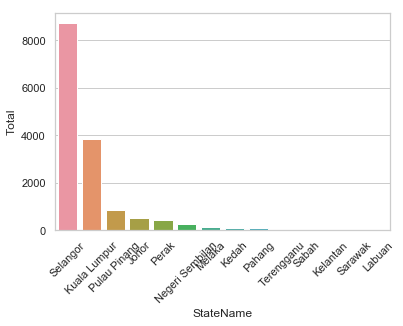

In [12]:
groupbyState = train[["State", "Type"]].groupby(["State"]).count().reset_index()
total_df = pd.merge(left=groupbyState, right=state_labels, how='left', left_on='State', right_on='StateID')
data = total_df[["Type", "StateName"]].rename(index=str, columns={ "Type": "Total" })

sns.set(style="whitegrid")
ax = sns.barplot(x="StateName", y="Total", data=data.sort_values(by=['Total'], ascending=False))
for item in ax.get_xticklabels():
    item.set_rotation(45)

This is in accordance with the size of the state, in terms of number of inhabitants.

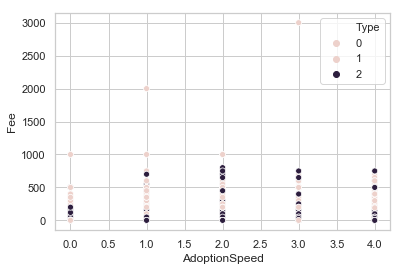

In [13]:
ax = sns.scatterplot(x="AdoptionSpeed", y="Fee", hue="Type", data=train)

## Deep-dive into a specific example
To further understand the data, let's have a look at all the data we have for a single pet.

In [14]:
pet = train.sample(1)
print("Here are the details for %s: \n\n %s \n" % (pet.iloc[0]["Name"], pet.iloc[0]["Description"]))
pet.T

Here are the details for nan: 

 Those cats are very healthy. Age 3 months old but look big. The owner kept them after the mother cat left. They are very cudly, active and toilet trained. 



,7819
Type,2
Name,NaN
Age,3
Breed1,266
Breed2,0
Gender,3
Color1,1
Color2,6
Color3,7
MaturitySize,3


Besides the information, available in the `train.csv` file, we also have access to the pictures, the "metadata" and the "sentiment". Let's have a look at the first 2 pictures in this example.

Say hello to nan ! 😃 
(PetID 98f0a2ac7)


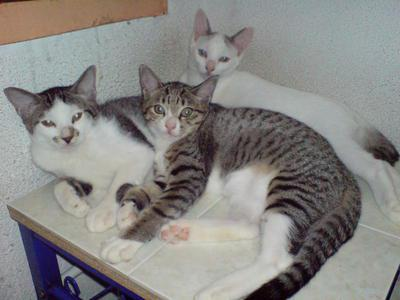

In [15]:
pet_id = pet.iloc[0]["PetID"]
print("Say hello to %s ! 😃 \n(PetID %s)" % (pet.iloc[0]["Name"], pet_id))
                                                   
# With this PetID, we can open the images `<pet_id>-1.jpg` in the '..in/train/train_images' folder
TRAIN_IMAGES_FOLDER = os.path.join(IN_FOLDER, "train", "train_images")
train_images_path = os.listdir(TRAIN_IMAGES_FOLDER)
pet_images = list(filter(lambda p: pet_id in p, train_images_path))

Image(os.path.join(TRAIN_IMAGES_FOLDER, pet_images[0]))

We also have access to the "sentiment". So let's open this file !

In [71]:
TRAIN_SENTIMENT_FOLDER = os.path.join(IN_FOLDER, "train", "train_sentiment")
sentiment = os.path.join(TRAIN_SENTIMENT_FOLDER, pet_id + ".json")

with open(sentiment) as f:
    data = json.load(f)

pprint(data)

{'categories': [],
 'documentSentiment': {'magnitude': 0.1, 'score': 0.1},
 'entities': [{'mentions': [{'text': {'beginOffset': -1, 'content': 'eye'},
                             'type': 'COMMON'}],
               'metadata': {},
               'name': 'eye',
               'salience': 0.7779752,
               'type': 'OTHER'},
              {'mentions': [{'text': {'beginOffset': -1, 'content': 'moo moo'},
                             'type': 'COMMON'}],
               'metadata': {},
               'name': 'moo moo',
               'salience': 0.2220248,
               'type': 'OTHER'}],
 'language': 'en',
 'sentences': [{'sentiment': {'magnitude': 0.1, 'score': 0.1},
                'text': {'beginOffset': -1, 'content': 'Blue eye moo moo'}}],
 'tokens': []}


It seems that the sentiment file is a sentiment analysis previously performed on the description given to the pet.
Let's find a submission with a high score, and one with a low score, to find out what makes a good and a bad description.

In [95]:
worst_score = data["documentSentiment"]["score"]
best_score = data["documentSentiment"]["score"]
for json_path in os.listdir(TRAIN_SENTIMENT_FOLDER):
    path = os.path.join(TRAIN_SENTIMENT_FOLDER, json_path)
    with open(path) as f:
        data = json.load(f)
        score = data["documentSentiment"]["score"]
        if score > best_score:
            best_score = score
            best_score_pet_id = json_path[:-5]
        elif score < worst_score:
            worst_score = score
            worst_score_pet_id = json_path[:-5]

best_description = train.loc[train["PetID"] == best_score_pet_id]["Description"].item()
worst_description = train.loc[train["PetID"] == worst_score_pet_id]["Description"].item()
print("The best score is %f for the description:\n\t%s\n" % (best_score, best_description))
print("The worst score is %f for the description:\n\t%s" % (worst_score, worst_description))

The best score is 0.900000 for the description:
	This is Fernando.He very Charming & friendly.He can be a good friend..

The worst score is -0.900000 for the description:
	-he is one of Momi kittens which is my cat -he looks like wearing a jacket wit mask -very spoiled and playful -toilet trained -i have to let him go bcause my acc condition is not stable just give me a call, text or email -afiq


## TODO - Feature engineering
Let's first hypothesize what feature would lead to a faster adoption rate:
 - The number of pictures in the profile `PhotoAmt`, even more for videos: `VideoAmt`
 - The age of the pet at the moment of adoption (the younger the more likely to be adopted) `Age` (in months)
 - The health/attention (`Vaccinated`, `Dewormed`, `Sterilized` + `Health`)
 - The cuteness (`Age` & images)
 - The description (`Description`, not a good sign if there is no description for instance)